In [1]:
# importing the necessary libraries
import pandas as pd
import rasterio
import os
import numpy as np

In [2]:
mask_dir = "/shared_space/BrazilSPEI/MODIS/Reclass_Data"

In [3]:
os.listdir(mask_dir)

['MCD12Q1_Maranhao_2004_forest.tif',
 'MCD12Q1_Maranhao_2006_pasture.tif',
 'MCD12Q1_Maranhao_2007_multiclass.tif',
 'MCD12Q1_Maranhao_2008_multiclass.tif',
 'MCD12Q1_Maranhao_2016_forest.tif',
 'MCD12Q1_Maranhao_2023_agri.tif',
 'MCD12Q1_Maranhao_2005_pasture.tif',
 'MCD12Q1_Maranhao_2012_forest.tif',
 'MCD12Q1_Maranhao_2023_multiclass.tif',
 'MCD12Q1_Maranhao_2008_agri.tif',
 'MCD12Q1_Maranhao_2022_multiclass.tif',
 'MCD12Q1_Maranhao_2001_forest.tif',
 'MCD12Q1_Maranhao_2021_forest.tif',
 'MCD12Q1_Maranhao_2004_multiclass.tif',
 'MCD12Q1_Maranhao_2006_forest.tif',
 'MCD12Q1_Maranhao_2024_agri.tif',
 'MCD12Q1_Maranhao_2005_multiclass.tif',
 'MCD12Q1_Maranhao_2009_multiclass.tif',
 'MCD12Q1_Maranhao_2014_pasture.tif',
 'MCD12Q1_Maranhao_2013_forest.tif',
 'MCD12Q1_Maranhao_2004_pasture.tif',
 'MCD12Q1_Maranhao_2011_agri.tif',
 'MCD12Q1_Maranhao_2003_agri.tif',
 'MCD12Q1_Maranhao_2011_forest.tif',
 'MCD12Q1_Maranhao_2021_pasture.tif',
 'MCD12Q1_Maranhao_2024_forest.tif',
 'MCD12Q1_Maran

In [4]:
records = []

In [5]:
for fname in sorted(os.listdir(mask_dir)):
    if not fname.endswith("_forest.tif"):
        continue
    
    year = int(fname.split("_")[2])
    path = os.path.join(mask_dir, fname)
    
    with rasterio.open(path) as src:
        arr = src.read(1)
        
    forest_pixels = np.sum(arr == 1)
    forest_area_km2 = forest_pixels * 0.25
    
    records.append((year, forest_pixels, forest_area_km2))

In [6]:
fname.split("_")[2]

'2024'

In [7]:
df = pd.DataFrame(records, columns = ["Year", "Forest_pixels", "Forest_km2"])
df = df.sort_values("Year").reset_index(drop = True)

In [8]:
df

,Year,Forest_pixels,Forest_km2
0,2001,529550,132387.50
1,2002,491295,122823.75
2,2003,462446,115611.50
3,2004,445416,111354.00
4,2005,445198,111299.50
5,2006,406084,101521.00
6,2007,389987,97496.75
7,2008,368250,92062.50
8,2009,364933,91233.25
9,2010,383102,95775.50


In [9]:
# computing change and percent change
df["Change_km2"] = df["Forest_km2"].diff()
df["Pct_change"] = df["Forest_km2"].pct_change() * 100
df

,Year,Forest_pixels,Forest_km2,Change_km2,Pct_change
0,2001,529550,132387.50,NaN,NaN
1,2002,491295,122823.75,-9563.75,-7.224058
2,2003,462446,115611.50,-7212.25,-5.872032
3,2004,445416,111354.00,-4257.50,-3.682592
4,2005,445198,111299.50,-54.50,-0.048943
5,2006,406084,101521.00,-9778.50,-8.785754
6,2007,389987,97496.75,-4024.25,-3.963958
7,2008,368250,92062.50,-5434.25,-5.573776
8,2009,364933,91233.25,-829.25,-0.900747
9,2010,383102,95775.50,4542.25,4.978722


In [10]:
# time-series plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Forest_km2"], marker = "o")
plt.xlabel("Year")
plt.ylabel("Forest Area (km2)")
plt.title("Forest Area in Maranhao (2001-2003)")
plt.grid(True)
plt.show()

<Figure size 1000x500 with 1 Axes>

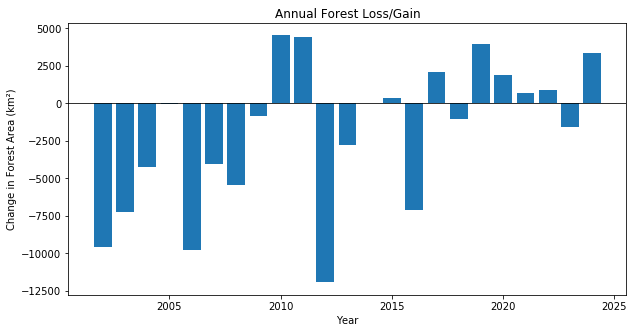

In [11]:
plt.figure(figsize=(10,5))
plt.bar(df["Year"], df["Change_km2"])
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel("Year")
plt.ylabel("Change in Forest Area (km²)")
plt.title("Annual Forest Loss/Gain")
plt.show()
